<a href="https://colab.research.google.com/github/vivekdevims/project/blob/main/AI_Job_Trends_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 AI Job Trends Analysis using Python
**Objective:** Analyze the impact of AI on job roles, industries, salaries, automation risk, and diversity using real-world job data.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("coolwarm")

In [9]:
# Step 2: Load dataset
df = pd.read_csv("/content/drive/MyDrive/data_set/ai_job_trends_dataset.csv")
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset Preview:
               Job Title       Industry  Job Status AI Impact Level  \
0     Investment analyst             IT  Increasing        Moderate   
1  Journalist, newspaper  Manufacturing  Increasing        Moderate   
2      Financial planner        Finance  Increasing             Low   
3        Legal secretary     Healthcare  Increasing            High   
4  Aeronautical engineer             IT  Increasing             Low   

   Median Salary (USD) Required Education  Experience Required (Years)  \
0             42109.76    Master’s Degree                            5   
1            132298.57    Master’s Degree                           15   
2            143279.19  Bachelor’s Degree                            4   
3             97576.13   Associate Degree                           15   
4             60956.63    Master’s Degree                           13   

   Job Openings (2024)  Projected Openings (2030)  Remote Work Ratio (%)  \
0                 1515             

In [10]:
# Step 3: Data Cleaning
print("\nMissing Values:")
print(df.isnull().sum())

df.fillna({
    "Median Salary (USD)": df["Median Salary (USD)"].median(),
    "Gender Diversity (%)": df["Gender Diversity (%)"].mean()
}, inplace=True)

df["AI Impact Level"] = df["AI Impact Level"].astype("category")
df["Industry"] = df["Industry"].astype("category")

df["Growth Rate (%)"] = ((df["Projected Openings (2030)"] - df["Job Openings (2024)"]) / df["Job Openings (2024)"]) * 100


Missing Values:
Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64


In [11]:
# Step 4: Basic Statistics
print("\nStatistical Summary:")
print(df.describe())
print("\nIndustries:", df["Industry"].unique())
print("\nAI Impact Levels:", df["AI Impact Level"].unique())


Statistical Summary:
       Median Salary (USD)  Experience Required (Years)  Job Openings (2024)  \
count         30000.000000                 30000.000000         30000.000000   
mean          90119.965639                    10.051433          5039.640833   
std           34412.013953                     6.060678          2861.009654   
min           30001.860000                     0.000000           100.000000   
25%           60500.702500                     5.000000          2570.000000   
50%           90274.115000                    10.000000          5034.000000   
75%          119454.710000                    15.000000          7527.000000   
max          149998.500000                    20.000000         10000.000000   

       Projected Openings (2030)  Remote Work Ratio (%)  Automation Risk (%)  \
count               30000.000000           30000.000000         30000.000000   
mean                 5074.218100              49.836431            50.154229   
std              


Top 10 Industries by Average Salary:
 Industry
IT                90941.672551
Retail            90903.677461
Finance           90510.599371
Entertainment     90131.000994
Manufacturing     89880.034508
Education         89665.728780
Healthcare        89494.073933
Transportation    89450.660172
Name: Median Salary (USD), dtype: float64


/tmp/ipython-input-1752774244.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_industries_salary = df.groupby("Industry")["Median Salary (USD)"].mean().sort_values(ascending=False).head(10)


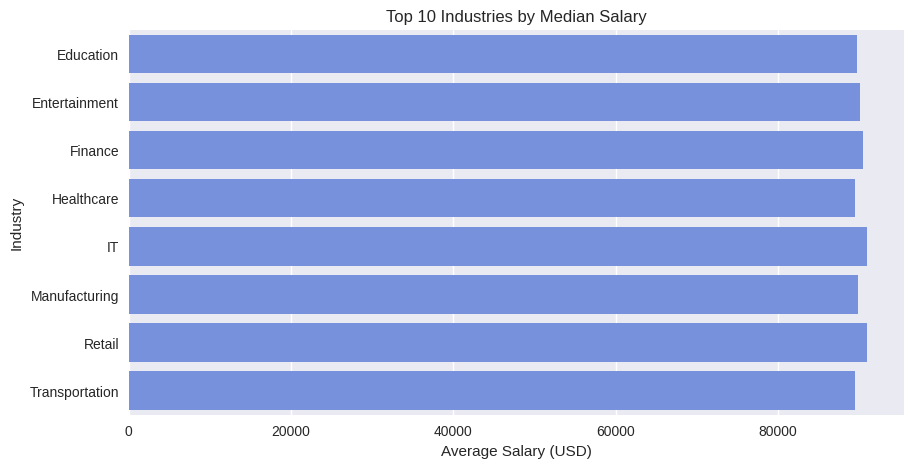

In [12]:
# Step 5: Salary Analysis by Industry
top_industries_salary = df.groupby("Industry")["Median Salary (USD)"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Industries by Average Salary:\n", top_industries_salary)

plt.figure(figsize=(10,5))
sns.barplot(x=top_industries_salary.values, y=top_industries_salary.index)
plt.title("Top 10 Industries by Median Salary")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Industry")
plt.show()

/tmp/ipython-input-2529962880.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  impact_salary = df.groupby("AI Impact Level")["Median Salary (USD)"].mean().sort_values(ascending=False)



Average Salary by AI Impact Level:
 AI Impact Level
High        90354.781024
Low         90265.040301
Moderate    89742.226538
Name: Median Salary (USD), dtype: float64


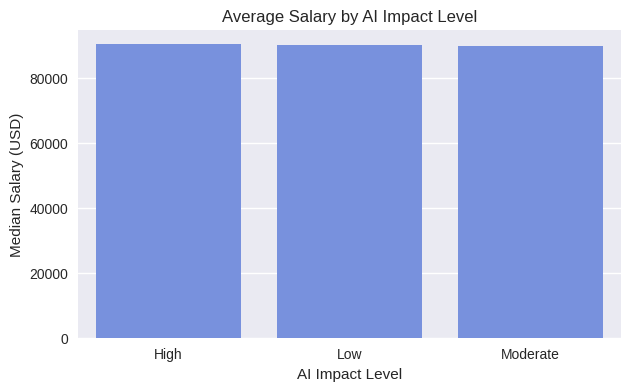

In [13]:
# Step 6: AI Impact Level vs Salary
impact_salary = df.groupby("AI Impact Level")["Median Salary (USD)"].mean().sort_values(ascending=False)
print("\nAverage Salary by AI Impact Level:\n", impact_salary)

plt.figure(figsize=(7,4))
sns.barplot(x=impact_salary.index, y=impact_salary.values)
plt.title("Average Salary by AI Impact Level")
plt.ylabel("Median Salary (USD)")
plt.show()


Average Automation Risk: 50.15%
Average Remote Work Ratio: 49.84%
Average Gender Diversity: 49.98%


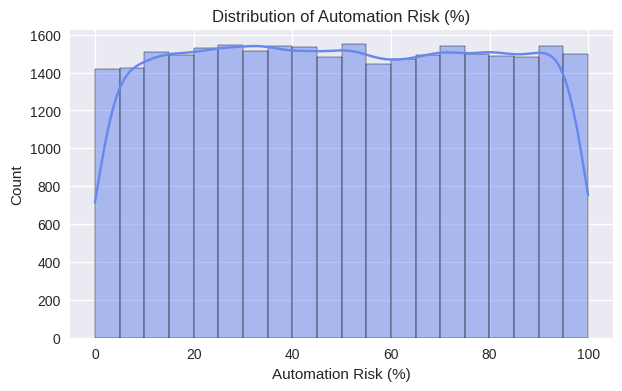

In [14]:
# Step 7: Automation Risk & Remote Work
avg_automation = df["Automation Risk (%)"].mean()
avg_remote = df["Remote Work Ratio (%)"].mean()
avg_gender = df["Gender Diversity (%)"].mean()

print(f"\nAverage Automation Risk: {avg_automation:.2f}%")
print(f"Average Remote Work Ratio: {avg_remote:.2f}%")
print(f"Average Gender Diversity: {avg_gender:.2f}%")

plt.figure(figsize=(7,4))
sns.histplot(df["Automation Risk (%)"], kde=True, bins=20)
plt.title("Distribution of Automation Risk (%)")
plt.show()


Top 10 Industries by Job Growth Rate (%):
 Industry
IT                176.568487
Finance           145.206940
Healthcare        144.356640
Entertainment     139.235385
Education         137.226116
Manufacturing     130.824994
Retail            130.538290
Transportation    124.791475
Name: Growth Rate (%), dtype: float64


/tmp/ipython-input-2210103822.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  growth_by_industry = df.groupby("Industry")["Growth Rate (%)"].mean().sort_values(ascending=False).head(10)


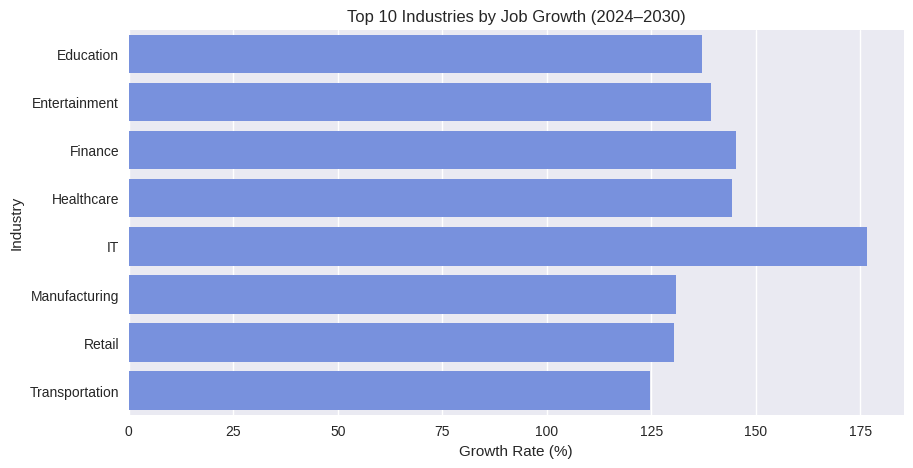

In [15]:
# Step 8: Job Growth by Industry (2024–2030)
growth_by_industry = df.groupby("Industry")["Growth Rate (%)"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Industries by Job Growth Rate (%):\n", growth_by_industry)

plt.figure(figsize=(10,5))
sns.barplot(x=growth_by_industry.values, y=growth_by_industry.index)
plt.title("Top 10 Industries by Job Growth (2024–2030)")
plt.xlabel("Growth Rate (%)")
plt.ylabel("Industry")
plt.show()


Top Locations by Gender Diversity:
 Location
Australia    50.489277
India        50.173175
Germany      50.128049
USA          50.114234
UK           50.110822
Brazil       50.072103
Canada       49.800114
China        48.951132
Name: Gender Diversity (%), dtype: float64


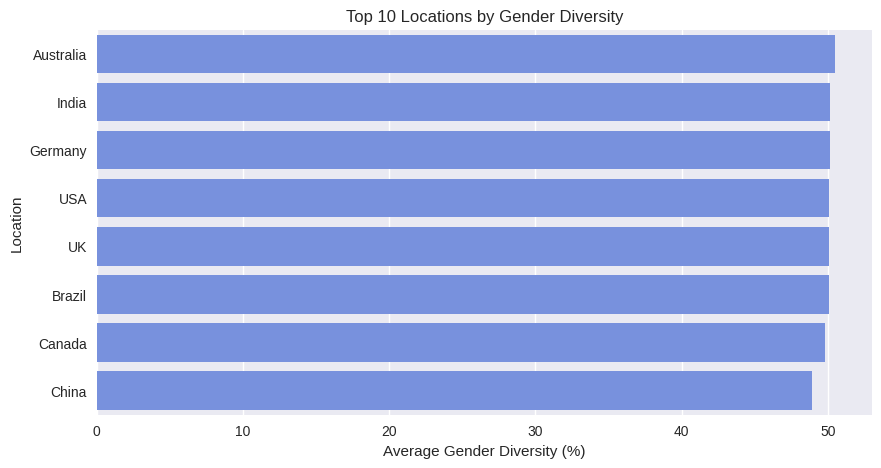

In [16]:
# Step 9: Gender Diversity and Location
top_gender_diversity = df.groupby("Location")["Gender Diversity (%)"].mean().sort_values(ascending=False).head(10)
print("\nTop Locations by Gender Diversity:\n", top_gender_diversity)

plt.figure(figsize=(10,5))
sns.barplot(x=top_gender_diversity.values, y=top_gender_diversity.index)
plt.title("Top 10 Locations by Gender Diversity")
plt.xlabel("Average Gender Diversity (%)")
plt.show()

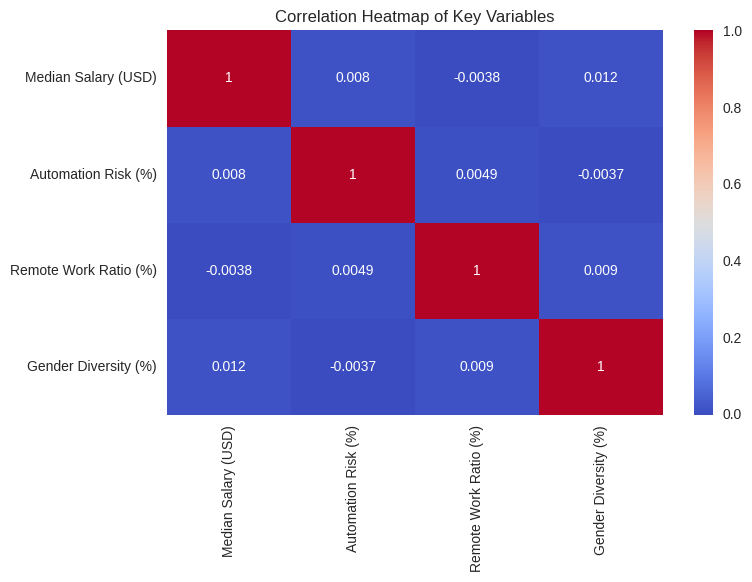

In [17]:
# Step 10: Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df[["Median Salary (USD)", "Automation Risk (%)", "Remote Work Ratio (%)", "Gender Diversity (%)"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Variables")
plt.show()

In [18]:
# Step 11: Key Findings Summary
print("\n✅ KEY INSIGHTS SUMMARY:")
print(f"- Highest-paying industries: {top_industries_salary.index[0]} and {top_industries_salary.index[1]}")
print(f"- Average automation risk: {avg_automation:.2f}%")
print(f"- Average remote work ratio: {avg_remote:.2f}%")
print(f"- Top industry by growth: {growth_by_industry.index[0]} (+{growth_by_industry.values[0]:.2f}%)")
print(f"- Top country for gender diversity: {top_gender_diversity.index[0]}")


✅ KEY INSIGHTS SUMMARY:
- Highest-paying industries: IT and Retail
- Average automation risk: 50.15%
- Average remote work ratio: 49.84%
- Top industry by growth: IT (+176.57%)
- Top country for gender diversity: Australia


In [19]:
# Step 12: Export Results (Optional)
top_industries_salary.to_csv("Top_Industries_Salary.csv")
growth_by_industry.to_csv("Top_Industries_Growth.csv")
impact_salary.to_csv("AI_Impact_Salary.csv")

print("Files exported successfully!")

Files exported successfully!


## 🧠 Summary
Conducted analysis on 30,000+ job records to identify AI's impact on salaries, automation risk, and gender diversity.
Found that **IT, Finance, and Healthcare** industries will experience the **fastest job growth (up to +176%)** by 2030.
Created data visualizations using **Python (Pandas, Matplotlib, Seaborn)** to communicate actionable insights.